Decision |Tree Classifier has same concept as Decision Tree Regression except we will be predicting Dicrete value instead of Continious value(in Regression).(Concept of Decision Tree is explained)

In [0]:
import pandas as pd


In [26]:
titanic_url_path = 'https://raw.githubusercontent.com/coding-blocks-archives/machine-learning-online-2018/master/13.%20Decision%20Trees/titanic.csv'
titanic_dataFrame = pd.read_csv(titanic_url_path)
titanic_dataFrame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<font size=5 color='red'>Data Processing.</font>
<br>Dropping unnecessary columns

In [0]:
to_drop = ['PassengerId',
          'Name',
          'Parch',
          'Ticket',
          'Cabin',
          'Embarked']

In [0]:
titanic_dataFrame.drop(columns=to_drop, inplace=True)

In [29]:
titanic_dataFrame.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500
5,0,3,male,NaN,0,8.4583
6,0,1,male,54.0,0,51.8625
7,0,3,male,2.0,3,21.0750
8,1,3,female,27.0,0,11.1333
9,1,2,female,14.0,1,30.0708


Filling empty values for age row with MEAN of age

In [0]:
titanic_dataFrame['Age'].fillna(titanic_dataFrame['Age'].mean(), inplace=True)

In [31]:
titanic_dataFrame.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.000000,1,7.2500
1,1,1,female,38.000000,1,71.2833
2,1,3,female,26.000000,0,7.9250
3,1,1,female,35.000000,1,53.1000
4,0,3,male,35.000000,0,8.0500
5,0,3,male,29.699118,0,8.4583
6,0,1,male,54.000000,0,51.8625
7,0,3,male,2.000000,3,21.0750
8,1,3,female,27.000000,0,11.1333
9,1,2,female,14.000000,1,30.0708


Replacing Sex(male,female) into Sex(0,1)

In [0]:
titanic_dataFrame.replace(['female','male'], [0,1], inplace=True)

In [33]:
titanic_dataFrame.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,22.0,1,7.2500
1,1,1,0,38.0,1,71.2833
2,1,3,0,26.0,0,7.9250
3,1,1,0,35.0,1,53.1000
4,0,3,1,35.0,0,8.0500


Dividing dataset into Dependent(y) and Independent(X) variables

In [0]:
X, y = titanic_dataFrame.iloc[:, 1:], titanic_dataFrame.iloc[:, :1]

Splitting into Training and Test set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Creating the Decision Tree Classification model

Fitting Decision Tree Classification to the Training set

In [36]:
from sklearn.tree import DecisionTreeClassifier
titanic_dt = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=3)
titanic_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

Visualizing the Decision Tree

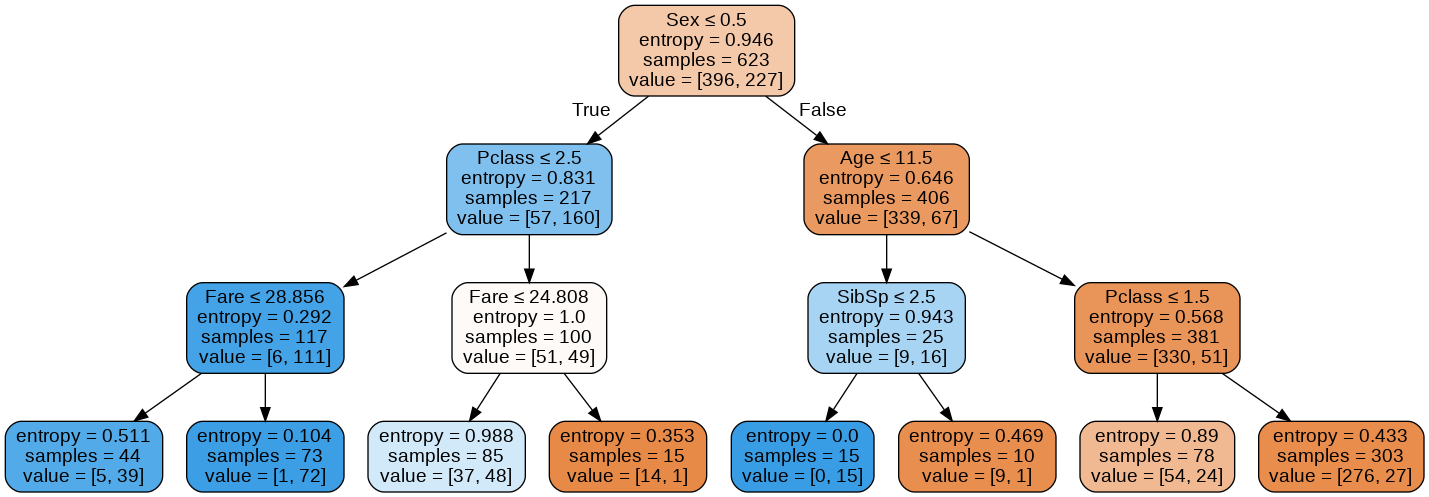

In [37]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(titanic_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Interpreting the above image:<br>
1st row is the name of the Independent variable and condition
<br>2nd row is entropy(TBD)
<br>3rd(samples) row is number of values that fall under that node
<br>4th(value) row tells us how many values (in this data) survived given the condition(1 row)

Entropy<br>
is measure of uncertainty or disorder (also called "purity"). e.g: The higher the entropy the more the disorder we have.
<br>So, we always should try to reduce the disorder(entropy) to get a better model
<br>For more about entropy, follow the [link](https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8)

Now, let's evaluate the accuracy of our classifier model!

In [0]:
y_pred = titanic_dt.predict(X_test) 

We need to compare the predicted values with the ones in Testing set(y_test).
<br>To achieve that we are going to need confusion matrix which is very helpful to evaluate the accuracy of the classifiers

In [39]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
cm

array([[135,  18],
       [ 39,  76]])

Interpreting the Confusion matrix:<br>
[[X1, Y1]<br>
[Y2, X2]]<br> 
X1 and X2 are number of values that were predicted correctly by the model.<br>
Y1 and Y2 are number of values that were predicted incorrectly by the model<br>

Let's calculate how many values there are in Testing set and how many survived and not survived

In [40]:
survived = 0
not_survived = 0
for row in y_test["Survived"]: #Loop throught the y_test
    if row==0: #0 means not_survived
        not_survived += 1
    else: #if survived
        survived += 1
print("Not Survived: "+ str(not_survived))
print("Survived: "+ str(survived))

Not Survived: 153
Survived: 115


So, let's get back to Confusion matrix. <br>
The model predicted that 135 are not survived, but actually 153 are not survived and 153-135=18( is the model's error).<br>
The model predicted that 76 are survived, but actually 115 are survived and 115-76=39(again model's error)

In total, model has predicted 18+39=57 values incorrectly and 135+76=211 correctly

Let's get the RATIO of correctly predicted values in TEST SET for now<br>
To get the ratio we need to do the following: <br> Correctly_predicted_values/total_number_of_values 

In [41]:
#I calculated the number of correctly predicted values up there and it is 211 and total is length of y_test
211/len(y_test) 

0.7873134328358209

So, 78% of data in TEST set was predicted correctly by our model created above. Now, let's get the score of the model by its function called SCORE

In [42]:
titanic_dt.score(X_test, y_test)

0.7873134328358209

Tadaa! It is the same value, which means Score returns the ratio of correctly predicted values which we computed from Confusion matrix<br>
However, main advantage of confusion matrix is only getting the score of correctly predicted values but also getting the score of each labels(not survived and survived).<br>
For score of Survived, we need to: correctly_predicted_for_survived/total_of_survived<br>
for score of Not Survived, we need to: correcly_predicted_for_not_survived/total_of_not_survived

In [43]:
correctly_predicted_for_survived = 76
total_of_survived = 115
score_of_survived = correctly_predicted_for_survived/total_of_survived
score_of_survived

0.6608695652173913

In [44]:
correcly_predicted_for_not_survived = 135
total_of_not_survived = 153
score_of_not_survived = correcly_predicted_for_not_survived/total_of_not_survived
score_of_not_survived

0.8823529411764706

Interpretation of above are:
<br>Model prediction was accurate 66% for Survived values
<br>Model prediction was accurate 88% for Unsurvived values

<font color=red>Now, let's create another model and tune the parameters

In [45]:
titanic_dt_2 = DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=5)
titanic_dt_2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

Gini is another way of calculating impurity(like entropy), both are almost same and below is the difference in formulas:

<img src="gini vs entropy.png">

Let's predict and store the variable to compare with the y_test in Confusion matrix

In [0]:
y_pred_2 = titanic_dt_2.predict(X_test) 

In [47]:
cm_2 = confusion_matrix(y_test, y_pred_2)
cm_2

array([[131,  22],
       [ 38,  77]])

Now, we have 38+22=60 values predicted incorrectly. Which means that Entropy is a bit better than Gini criterion

Conclusion: Our first model performs better than second one, because criterion=entropy gives better predictions for our data

1) 




In [49]:
titanic_dt_2.score(X_test,y_test)

0.7761194029850746

2)

In [50]:
# Predicted correctly (not survived) over total not survived

77/(77+38)

0.6695652173913044

3)

In [0]:
#above^

4)


In [52]:
# Prev and now difference in score

titanic_dt.score(X_test, y_test)-titanic_dt_2.score(X_test, y_test)

# First model slightly better than 2nd model

0.011194029850746245

5)

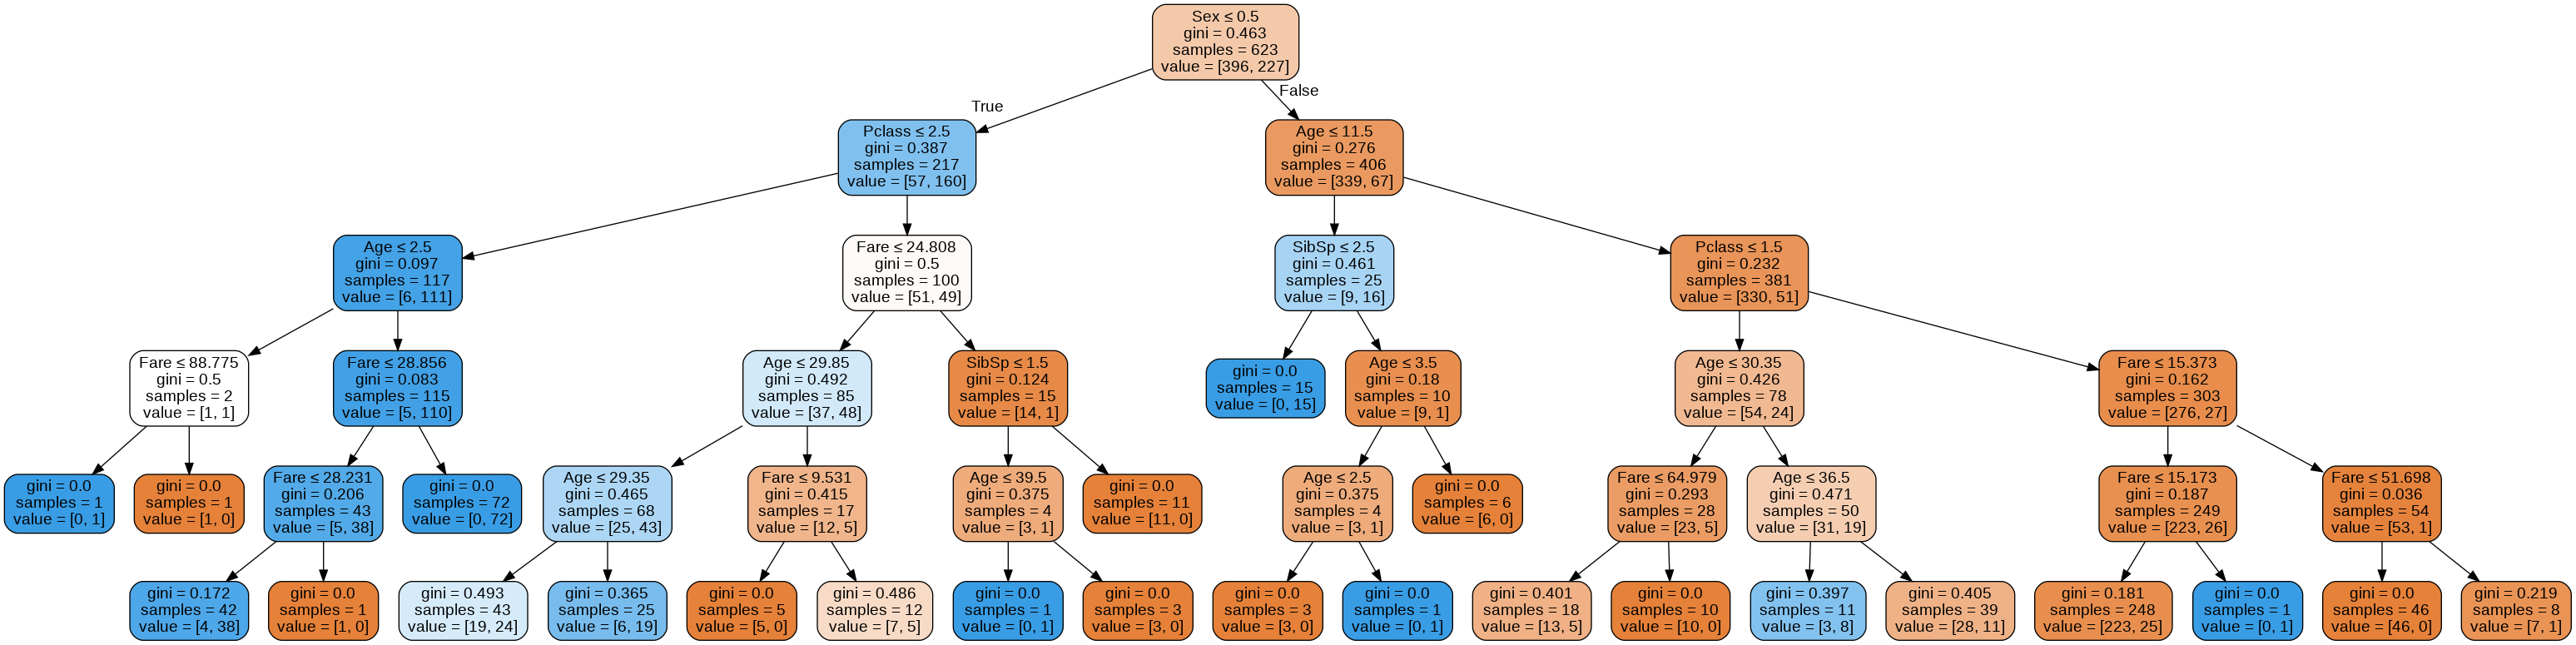

In [54]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(titanic_dt_2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

6)


In [0]:
dt3 = DecisionTreeClassifier('entropy', max_depth=5)

In [67]:
dt3.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

7)


In [78]:
y_pred3 = dt3.predict(X_test)

cm3 = confusion_matrix(y_test, y_pred3)

cm3

array([[133,  20],
       [ 40,  75]])

8)

In [79]:
(133+75)/(133+75+20+40)

0.7761194029850746

In [75]:
dt3.score(X_test, y_test)

0.7761194029850746

In [81]:
# All scores
print(titanic_dt.score(X_test, y_test),titanic_dt_2.score(X_test, y_test),dt3.score(X_test, y_test))

0.7873134328358209 0.7761194029850746 0.7761194029850746


### project1


1) Calculate score of survived for the second model

2) Calculate score of not survived for the second model

3) Explain and calculate the total score for the second model with Confusion matrix

4) Use Score function of the second model to get the score and compare with previous question

5) Visualize the Decision Tree for the second model

6) Create a third Decision Tree with entropy and depth to be 5

7) Create a confusion matrix for the third model

8) Calculate the score of the model with the Confusion Matrix and then compute the score with model's function

9) Make sure the scores are the same

10) Which one of these three models is the best?(Why? As Conclusion)

# Answer project 1

Questions from 1-10 are similar to what we have done

# project2

1) Import a dataset called "Social_Network_Ads.csv"

2)Split dataset into Dependant Variable & Indipendant Variable

3)Normilize the dataset(Gender column)

4)Split into DV&IV into Train and Test sets

5)Create Decision Tree Classifier with max_depth=3 and fit the Train set

6)Visualize the Tree

7)Get the Confusion Matrix for the model

8)Tune the parameters of model and create another one

9)Visualize the Tree and get the Confusion Matrix for the model

10)Compare both models and Conclude which one performed better

1)

In [0]:
data = pd.read_csv('Social_Network_Ads.csv')

2)

In [87]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [85]:
data.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [0]:
data['Gender'].replace('Male', 1, inplace = True)
data['Gender'].replace('Female', 0, inplace = True)

4)

In [0]:
x = data.iloc[:,1:4]
y = data['Purchased']

In [0]:
x_train, y_train, x_test, y_test = train_test_split(x,y,test_size=0.4)

5)

In [118]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(x_train,y_train)

ValueError: ignored

# answer project2

In [24]:
#Question1
import pandas as pd
social_dataset = pd.read_csv('Social_Network_Ads.csv')
social_dataset.head()

FileNotFoundError: ignored

In [0]:
#Question2
X, y = social_dataset.iloc[:, 1:4], social_dataset.iloc[:, 4]

In [0]:
#Question3
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
X['Gender'] = label_enc.fit_transform(X['Gender'])

In [0]:
#Question4
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [0]:
#Question5
from sklearn.tree import DecisionTreeClassifier
social_dt = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=3)
social_dt.fit(X_train, y_train)

In [0]:
#Question6
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(social_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [0]:
#Question7
y_pred = social_dt.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [0]:
#Error rate
error_rate = (3+14)/(58+45+3+14)
error_rate

In [0]:
#Question 8 
#Question 9 - Visualize the same way as before
social_dt_2 = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=5)
social_dt_2.fit(X_train, y_train)

In [0]:
y_pred_2 = social_dt_2.predict(X_test)

In [0]:
cm_2 = confusion_matrix(y_test, y_pred_2)
cm_2

In [0]:
cm_2[0,1]

In [0]:
#Error rate
17 / cm_2.sum() 

#Question10<br>
Conclusion: Both models perform similar and error rate of both of models are same, but we know(if you did not, now you do) that False Negative is much worse than False Positive(in most cases, depending on data) <br>
So, first model has 14 False Negative predictions and second model has 9 False Negatives. Therefore, we must choose second model as it has less False Negatives

## project 3

1) Import a dataset called "diabets.csv"

2)use diabet.describe to see the statistic of data

3)Replacing diabetes(False,True) into diabetes(0,1).

hint:you can use this code for changing the value of true and false to 1 and 0: diabet.applymap(lambda x: 1 if x == True else x)

4)Dividing dataset into Dependent(y) and Independent(X)variables

5)Splitting into Training and Test set: 70% train and 30% test

6)Create Decision Tree Classifier with max_depth=5 and fit the Train set

7)Visualize the Tree

8)predict y value for test data

9)Get the Confusion Matrix for the model

10)find the score of prdiction model

11)Tune the parameters of model and create another one
(hint:use gini)

12)Compare both models and Conclude which one performed better

## answer project 3 

In [0]:
#1
import pandas as pd
diabet = pd.read_csv('diabetes.csv')
diabet.head(10)

In [0]:
#2
diabet.describe()

In [0]:
#3 Replacing diabetes(False,True) into diabetes(0,1)
diabet = diabet.applymap(lambda x: 1 if x == True else x)
diabet = diabet.applymap(lambda x: 0 if x == False else x)
diabet.head()

In [0]:
#4 Dividing dataset into Dependent(y:diabetes) and Independent(X:pregnancies,plasma,Age,blood pressure,triceps skin thickness,insulin,bmi,diabetes pedigree,age) variables
X, y = diabet.iloc[:, :8], diabet.iloc[:, 8:]


In [0]:
#5 Splitting into Training and Test set: 70% train(768*0.7=538) and test(768-538=230) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [0]:
#6 Creating the Decision Tree Classification model
#Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
diabet_dt = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=5)
diabet_dt.fit(X_train, y_train)

In [0]:
#7 Visualizing the Decision Tree
!pip install pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(diabet_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Interpreting the above image:<br>
1st row is the name of the Independent variable and condition
<br>2nd row is entropy(TBD)
<br>3rd(samples) row is number of values that fall under that node
<br>4th(value) row tells us how many values (in this data) survived given the condition(1 row)

In [0]:
#8 y prediction
y_pred = diabet_dt.predict(X_test) 

In [0]:
#9 confusion matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
cm

In [0]:
#10 diabet = 0
diabet = 0
not_diabet = 0
for row in y_test["diabetes"]: #Loop throught the y_test
    if row==0: #0 means not_diabet
        not_diabet += 1
    else: #if diabet
        diabet += 1
print("Not diabet: "+ str(not_diabet))
print("diabet: "+ str(diabet))

So, let's get back to Confusion matrix. 
The model predicted that 121 are not diabet, but actually 146 are not diabet and 146-121=25( is the model's error).
The model predicted that 56 are diabet, but actually 85 are got diabet and 85-56=29(again model's error)

In total, model has predicted 25+29=54 values incorrectly and 121+56=177 correctly

Let's get the RATIO of correctly predicted values in TEST SET for now
To get the ratio we need to do the following: 
Correctly_predicted_values/total_number_of_values

In [0]:
#I calculated the number of correctly predicted values up there and it is 177 and total is length of y_test
177/len(y_test) 

So, 77% of data in TEST set was predicted correctly by our model created above. Now, let's get the score of the model by its function called SCORE

In [0]:
diabet_dt.score(X_test, y_test)

Tadaa! It is the same value, which means Score returns the ratio of correctly predicted values which we computed from Confusion matrix<br>

However, main advantage of confusion matrix is only getting the score of correctly predicted values but also getting the score of each labels(not diabet and diabet).<br>
For score of diabet, we need to: correctly_predicted_for_diabet/total_of_diabet<br>
for score of Not diabet, we need to: correctly_predicted_for_not_diabet/total_of_not_diabet

In [0]:
correctly_predicted_for_diabet = 56
total_of_diabet = 85
score_of_diabet = correctly_predicted_for_diabet/total_of_diabet
score_of_diabet

In [0]:
correctly_predicted_for_not_diabet = 121
total_of_not_diabet = 146
score_of_not_diabet = correctly_predicted_for_not_diabet/total_of_not_diabet
score_of_not_diabet

correctly_predicted_for_not_diabet = 121
total_of_not_diabet = 146
score_of_not_diabet = correctly_predicted_for_not_diabet/total_of_not_diabet
score_of_not_diabet

In [0]:
#11 
diabet_dt_2 = DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=5)
diabet_dt_2.fit(X_train, y_train)

In [0]:
y_pred_2 = diabet_dt_2.predict(X_test) 

In [0]:
#12
cm_2 = confusion_matrix(y_test, y_pred_2)
cm_2

Now, we have 30+24=54 values predicted incorrectly. Which means that Entropy is same with Gini criterion in this example.